In [19]:
%matplotlib inline


import tomso as tomso
from tomso import gyre
import mesa_reader as mr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd



# set some global options
plt.rcParams['figure.figsize'] = (24,10)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 20
Lsun = 3.9e33

#plt.style.use('/Users/mcantiello/.matplotlib/mesa.mplstyle')



In [20]:
def inspect_mode(filename):
    header, data = tomso.gyre.load_summary(filename)
    plt.plot(data['x'],data['dW_dx'])
    plt.xlabel(r'$x$ = r / R$_{\odot}$')
    plt.ylabel(r'd$W$ / d$x$')
    print('Frequency (muHz): ', header['Refreq'])
    print('Growth rate: ',header['eta'])
    
# Given a GYRE mode file produces a 4 panel plot including: de_dx, dw_dx, radial and horizontal displacement. 
# Plus info about frequency, ell, H, np, ng
def inspect_modes(filename):
    alpha=0.8
    linestyle=':'
    header, data = tomso.gyre.load_summary(filename)
    
    f, axarr = plt.subplots(2, 3, sharex=True)
    f.subplots_adjust(hspace=0)
    f.subplots_adjust(wspace=0.1)
    
    frequency= str("{0:.3f}".format(header['Refreq']))
    H = str("{:.2e}".format(header['H']))
    eta = str("{0:.3f}".format(header['eta']))
    nnp = str(int(header['n_p']))
    ng = str(int(header['n_g']))
    ell = str(int(header['l']))
    gamma = str("{0:.3f}".format(header['Imfreq']))
    

    axarr[0, 0].plot(data['x'],data['dW_dx'])
    axarr[0, 0].set_title('Differential Work and Inertia')
    
    axarr[0, 0].annotate(r'$\nu$ = '+frequency+r'$\mu$Hz', xy=(0.08, 0.52),xycoords='axes fraction')
    axarr[0, 0].annotate(r'$\eta$ = '+eta, xy=(0.08, 0.44),xycoords='axes fraction')
    axarr[0, 0].annotate(r'$\ell$ = '+ell, xy=(0.08, 0.36),xycoords='axes fraction')
    axarr[0, 0].annotate(r'n$_p$ = '+nnp, xy=(0.08, 0.28),xycoords='axes fraction')
    axarr[0, 0].annotate(r'n$_g$ = '+ng, xy=(0.08, 0.20),xycoords='axes fraction')
    axarr[0, 0].annotate(r'H = '+H, xy=(0.08, 0.12),xycoords='axes fraction')
    axarr[0, 0].annotate(r'$\gamma$ = '+gamma, xy=(0.08, 0.04),xycoords='axes fraction')
    axarr[0, 0].set_ylabel(r'd$W$ / d$x$')

    axarr[1, 0].plot(data['x'],np.log10(data['dE_dx']))
    axarr[1, 0].set_xlabel(r'$x$ = r / R$_{\odot}$')
    axarr[1, 0].set_ylabel(r'$\log \,$ (d$\epsilon$ / d$x$)')
    
    
    axarr[0, 2].plot(data['x'],data['Rexi_r'],label=' Real',alpha=1.0)
    axarr[0, 2].plot(data['x'],data['Imxi_r'],label=' Imaginary',alpha=alpha,linestyle=linestyle)
    axarr[0, 2].set_title(r'Eigenfunctions')
    axarr[0, 2].yaxis.set_label_position("right")
    axarr[0, 2].yaxis.tick_right()
    axarr[0, 2].set_ylabel(r'$\xi_{r}$')
    axarr[0, 2].legend(loc='lower left')    
    
    axarr[1, 2].plot(data['x'],data['Rexi_h'],label=' Real',alpha=1.0)
    axarr[1, 2].plot(data['x'],data['Imxi_h'],label=' Imaginary',alpha=alpha,linestyle=linestyle)
    axarr[1, 2].set_xlabel(r'$x$ = r / R$_{\odot}$')
    axarr[1, 2].yaxis.set_label_position("right")
    axarr[1, 2].yaxis.tick_right()
    axarr[1, 2].set_ylabel(r'$\xi_{h}$')
    
    axarr[0, 1].plot(data['x'],np.log10(np.sqrt((data['rho']))*np.abs(data['Rexi_r'])),label=' Real',alpha=1.0)
    axarr[0, 1].plot(data['x'],np.log10(np.sqrt((data['rho']))*np.abs(data['Imxi_r'])),label=' Imaginary',alpha=alpha,linestyle=linestyle)
    axarr[0, 1].set_title(r'$\log \, (\sqrt{\rho}\, \xi$)')
    #axarr[0, 1].yaxis.tick_left()
    axarr[0, 1].yaxis.tick_right()
    #axarr[0, 1].set_ylabel(r'$\xi_{r}$')
    axarr[0, 1].legend(loc='lower left')    
    
    axarr[1, 1].plot(data['x'],np.log10(np.sqrt((data['rho']))*np.abs(data['Rexi_h'])),label=' Real',alpha=1.0)
    axarr[1, 1].plot(data['x'],np.log10(np.sqrt((data['rho']))*np.abs(data['Imxi_h'])),label=' Imaginary',alpha=alpha,linestyle=linestyle)
    axarr[1, 1].set_xlabel(r'$x$ = r / R$_{\odot}$')
    #axarr[1, 1].yaxis.tick_left()
    axarr[1, 1].yaxis.tick_right()
    #axarr[1, 1].set_ylabel(r'$\xi_{h}$')
    FILENAME = frequency+'_'+ell+'.pdf'
    plt.savefig(FILENAME)
    
# Find modes from GYRE summary with largest H and return GYRE mode filename number
def find_mode(filename):
    header, data = tomso.gyre.load_summary(filename)
    jj= data['j']
    H = data['H']
    return str(int(jj[np.argmax(H)]));    

# Find modes with \ell=ll from GYRE summary with largest H and return GYRE mode filename number
def find_max_H_ll(filename,ll):
    header, data = tomso.gyre.load_summary(filename)
    jj= data['j']
    H = data['H']
    ell=data['l']
    i_ll=np.where(ell == ll)
    H=H[i_ll]
    jj=jj[i_ll]
    return str(int(jj[np.argmax(H)]));    

def find_max_xih_ll(filename,ll):
    header, data = tomso.gyre.load_summary(filename)
    data
    jj= data['j']
    xi_r_surface=data['Rexi_r_ref']
    xi_h_surface=data['Rexi_h_ref']
    ell=data['l']
    i_ll=np.where(ell == ll)
    xi_h_surface=xi_h_surface[i_ll]
    jj=jj[i_ll]
    return str(int(jj[np.argmax(xi_h_surface)]));    
    
    
    
    


# Reading MESA model (10M$_\odot$)

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


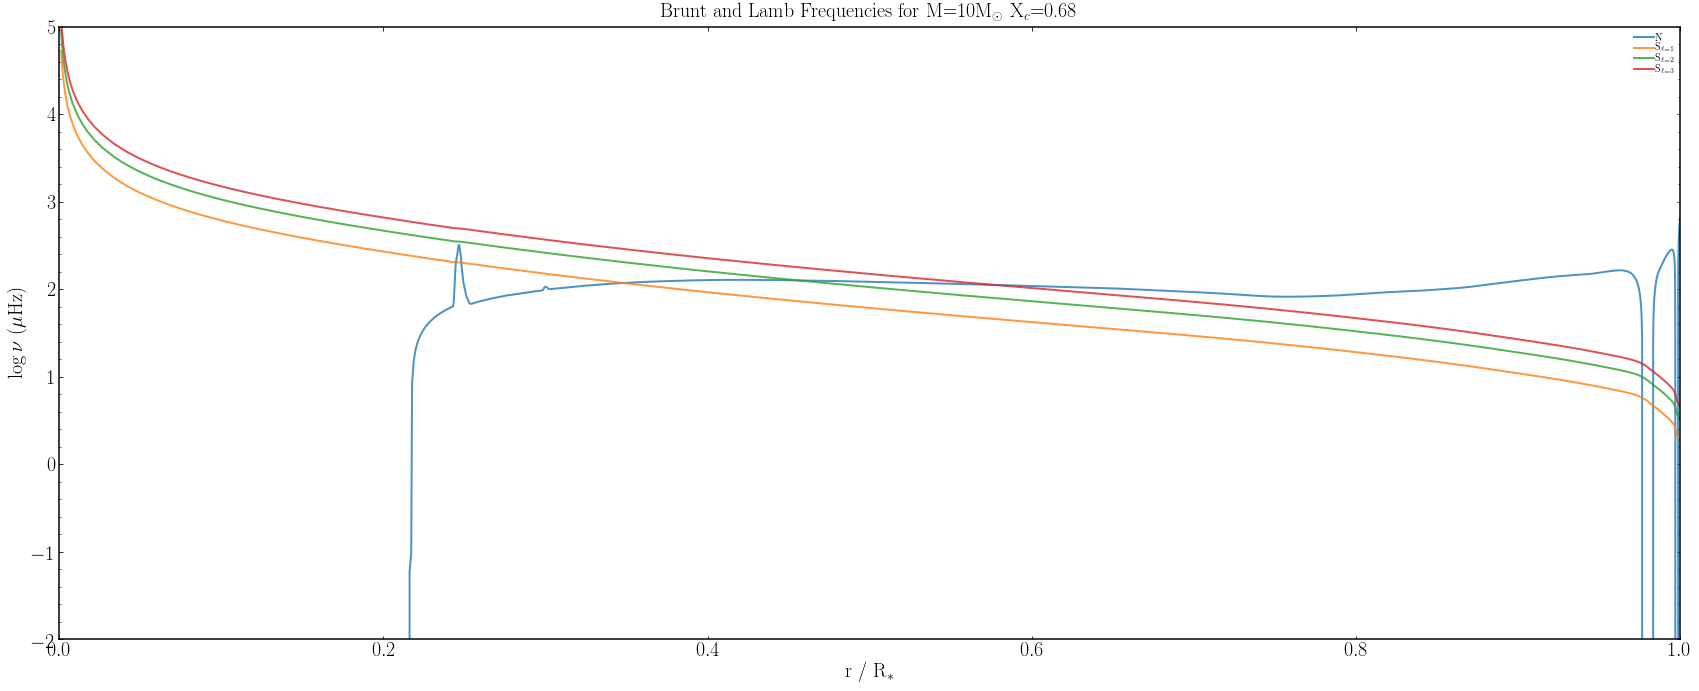

In [21]:
mesa=mr.MesaData('10/LOGS/profile1.data')
dir(mesa)
mesa.bulk_names

# Units of brunt in MESA? 
#log_brunt_nu(k) = safe_log10_cr((1d6/(2*pi))*sqrt(max(0d0,s% brunt_N2(k))))

brunt=(1e6/6.283)*10**mesa.log_brunt_N
lamb1=mesa.lamb_Sl1
lamb2=mesa.lamb_Sl2
lamb3=mesa.lamb_Sl3
plt.plot(mesa.radius/mesa.radius[1],np.log10(brunt),linewidth=2, alpha=0.8,label = r'  N')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb1),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 1}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb2),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 2}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb3),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 3}$')
legend = plt.legend(loc='upper right',fontsize=10)

plt.axis([0,1, -2,5])
plt.xlabel(r'r / R$_*$')
plt.ylabel(r'$\log \nu$ ($\mu$Hz)')
plt.title(r'Brunt and Lamb Frequencies for M=10M$_\odot$ X$_c$=0.68')
plt.savefig("Propagation10Msun.pdf")

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


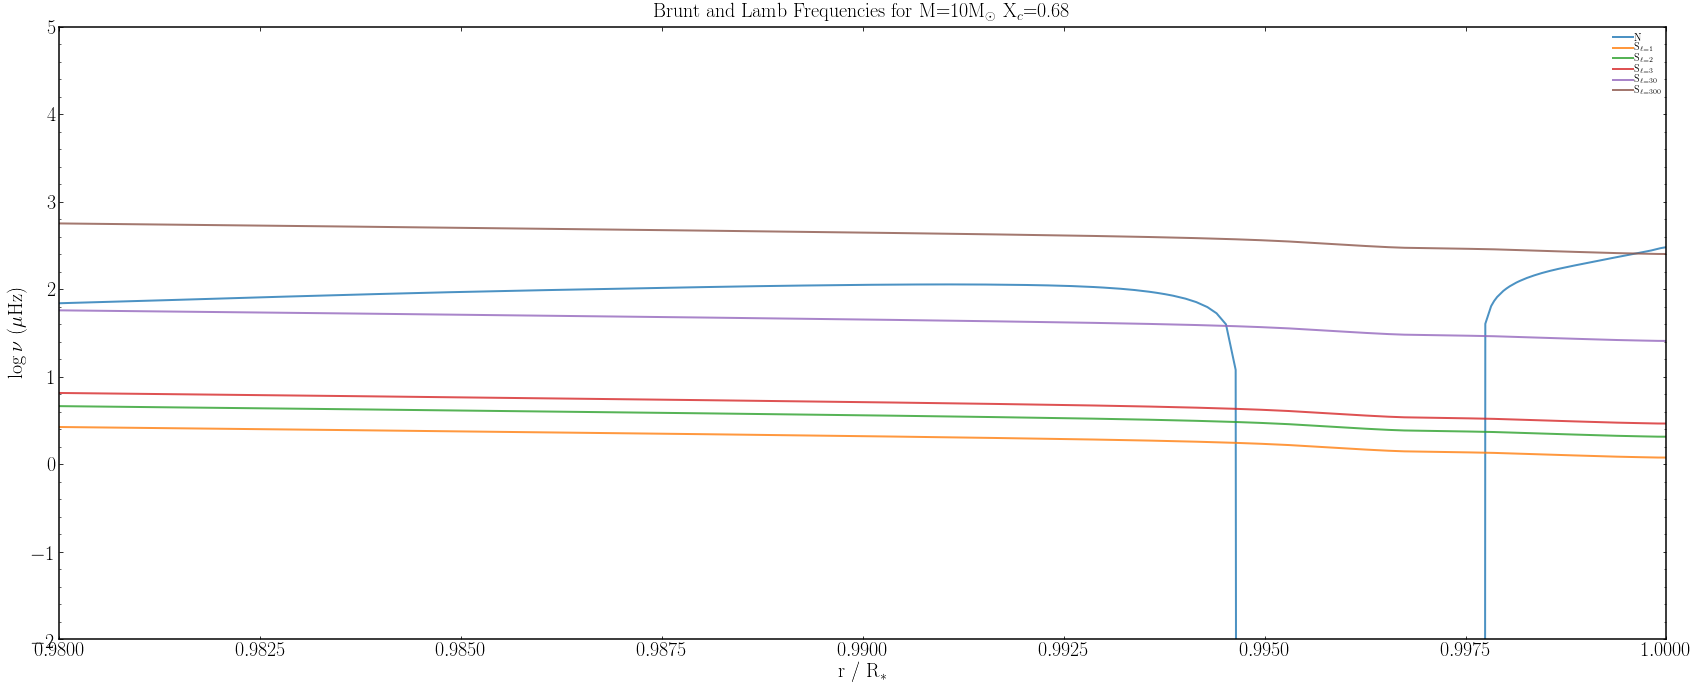

In [22]:
mesa=mr.MesaData('10/LOGS/profile2.data')
dir(mesa)
mesa.bulk_names

# Units of brunt in MESA? 
#log_brunt_nu(k) = safe_log10_cr((1d6/(2*pi))*sqrt(max(0d0,s% brunt_N2(k))))

brunt=(1e6/6.283)*10**mesa.log_brunt_N
lamb1=mesa.lamb_Sl1
lamb2=mesa.lamb_Sl2
lamb3=mesa.lamb_Sl3
lamb30=lamb1*(30*(30+1)/2)**0.5
lamb300=lamb1*(300*(300+1)/2)**0.5


plt.plot(mesa.radius/mesa.radius[1],np.log10(brunt),linewidth=2, alpha=0.8,label = r'  N')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb1),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 1}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb2),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 2}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb3),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 3}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb30),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 30}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb300),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 300}$')



legend = plt.legend(loc='upper right',fontsize=10)

plt.axis([0.98,1, -2,5])
plt.xlabel(r'r / R$_*$')
plt.ylabel(r'$\log \nu$ ($\mu$Hz)')
plt.title(r'Brunt and Lamb Frequencies for M=10M$_\odot$ X$_c$=0.68')
plt.savefig("Propagation10Msun_zoom.pdf")

## Running GYRE calculations using a 10Msun MESA model
Here's the typical gyre.in file: 

```
&constants
/

&model
	model_type = 'EVOL'
	!file = 'spb.mesa'
	file = '10/LOGS/profile2.data.GYRE'
	file_format = 'MESA'
/

&mode
	l = 1
	tag = 'l=1'
/

&mode
	l = 2
	tag = 'l=2'
/

&mode
  l = 3
  tag = 'l=3'
/


&osc
	nonadiabatic = .TRUE.
/

&num
	diff_scheme = 'COLLOC_GL2' ! MAGNUS_GL2
/

&scan
	grid_type = 'INVERSE'
	freq_min_units = 'UHZ'
        freq_max_units = 'UHZ'
	freq_min = 1
	freq_max = 50
	n_freq = 1500
	tag_list = 'l=1'
/

&scan
	grid_type = 'INVERSE'
	freq_min_units = 'UHZ'
	freq_max_units = 'UHZ'
	freq_min = 1
	freq_max = 50
	n_freq = 1500
	tag_list = 'l=2'
/

&scan
        grid_type = 'INVERSE'
        freq_min_units = 'UHZ'
        freq_max_units = 'UHZ'
        freq_min = 1
        freq_max = 50
        n_freq = 1500
        tag_list = 'l=3'
/



&grid
	n_inner = 5
	alpha_osc = 10
	alpha_exp = 2
/

&ad_output
/

&nad_output
	summary_file = '10XC068_1_50mode.txt'
	summary_file_format = 'TXT'
	summary_item_list = 'j,l,n_p,n_g,eta,omega,freq,x_ref,xi_r_ref,xi_h_ref,H'
	mode_file_format = 'TXT'
	mode_template = '10XC068_1_50mode.%J.txt'
	mode_item_list = 'j,l,n_pg,n_p,n_g,eta,omega,freq,x,f_T,xi_r,xi_h,dW_dx,dE_dx,H,L_star,T,M_r,rho,P,prop_type'
	freq_units = 'UHZ'
/

```


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


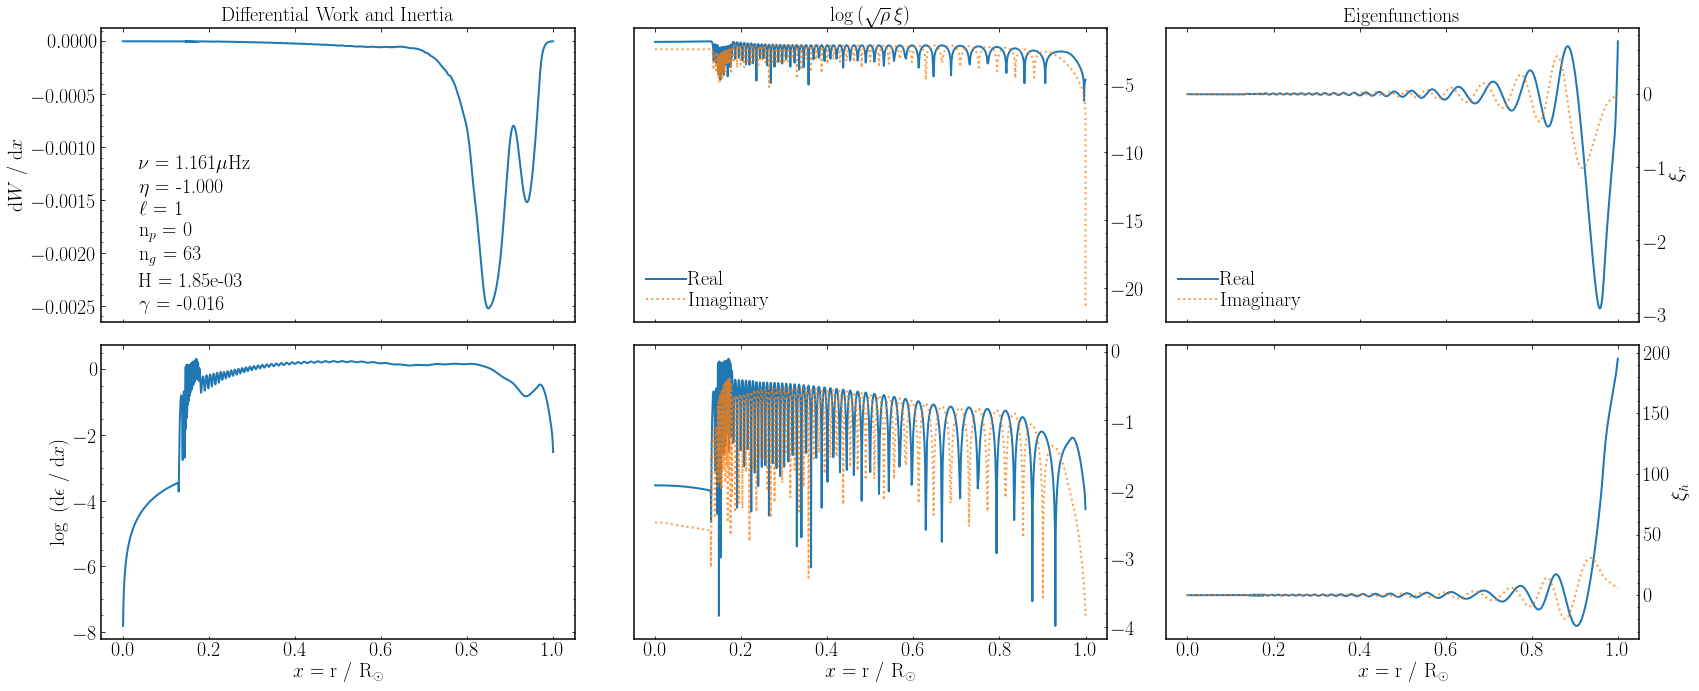

In [27]:
#inspect_modes('10XC068_1_50mode.00056.txt') 
inspect_modes('10/modes/10XC033_1_50mode.00010.txt') 

# Results of GYRE mode calculations for $\nu \in [1,50]$ $\mu$Hz , 10 M$_\odot$ model with $X_C$=0.66 
We're plotting the modes with largest surface horizontal displacement $\xi_h$

//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:61: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:62: Runt

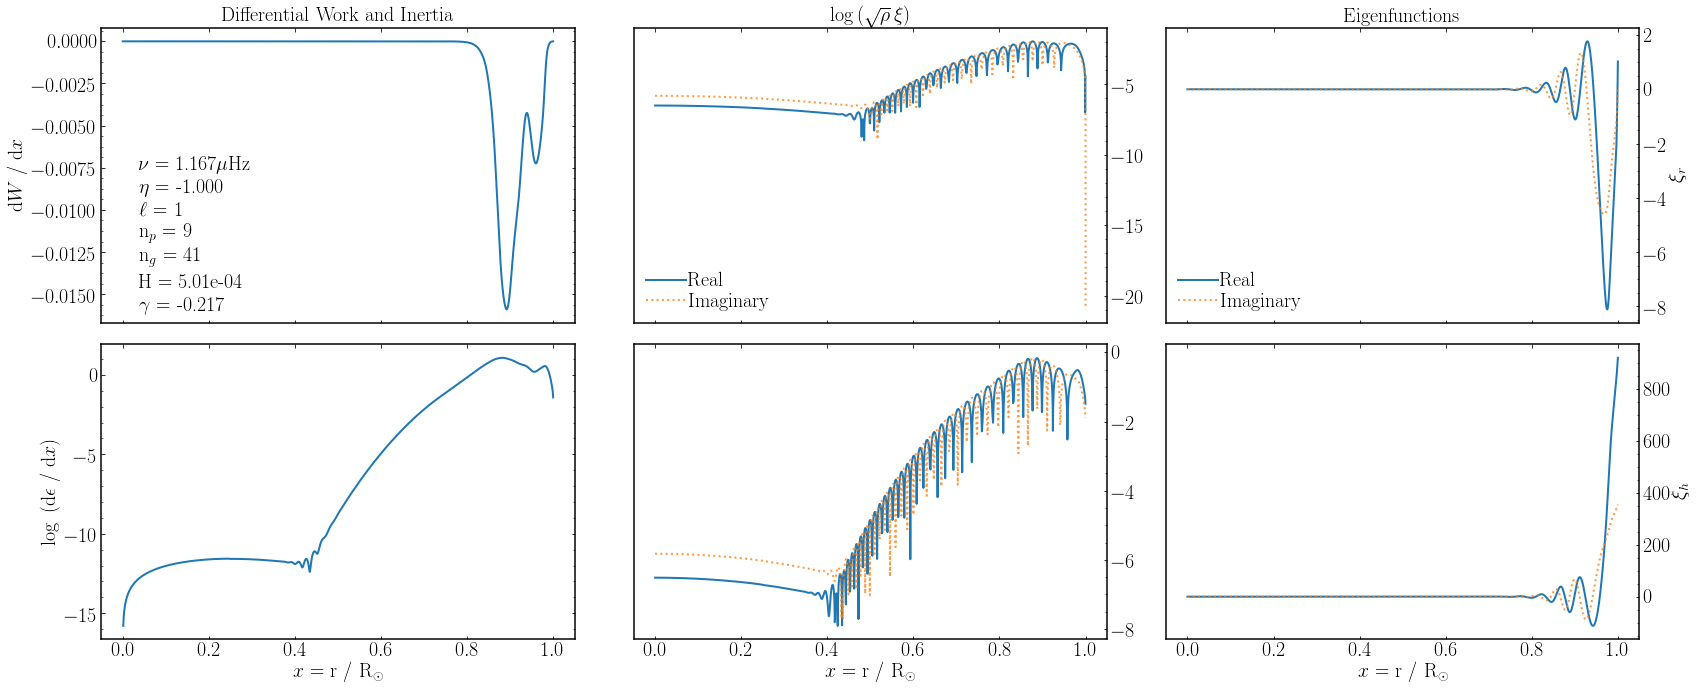

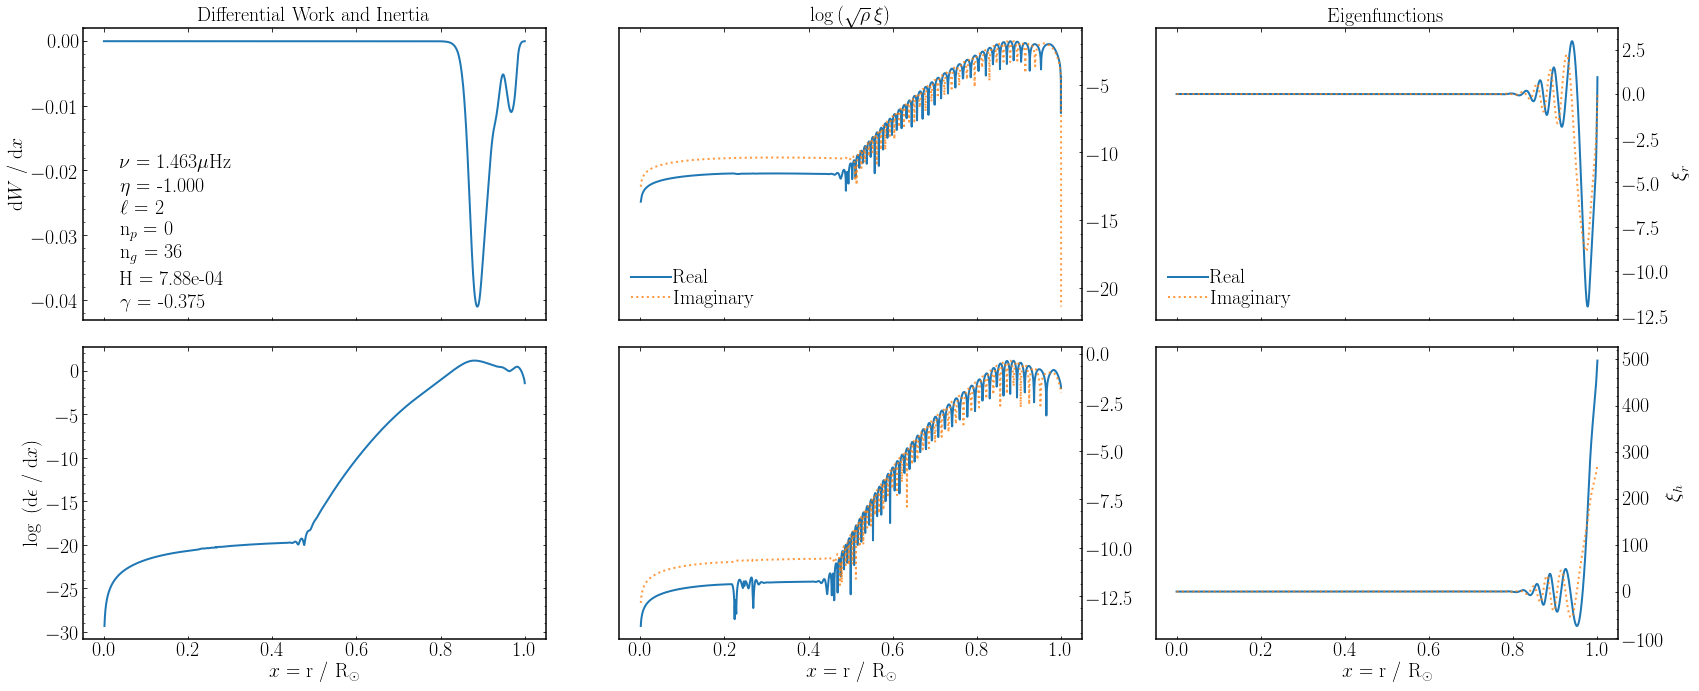

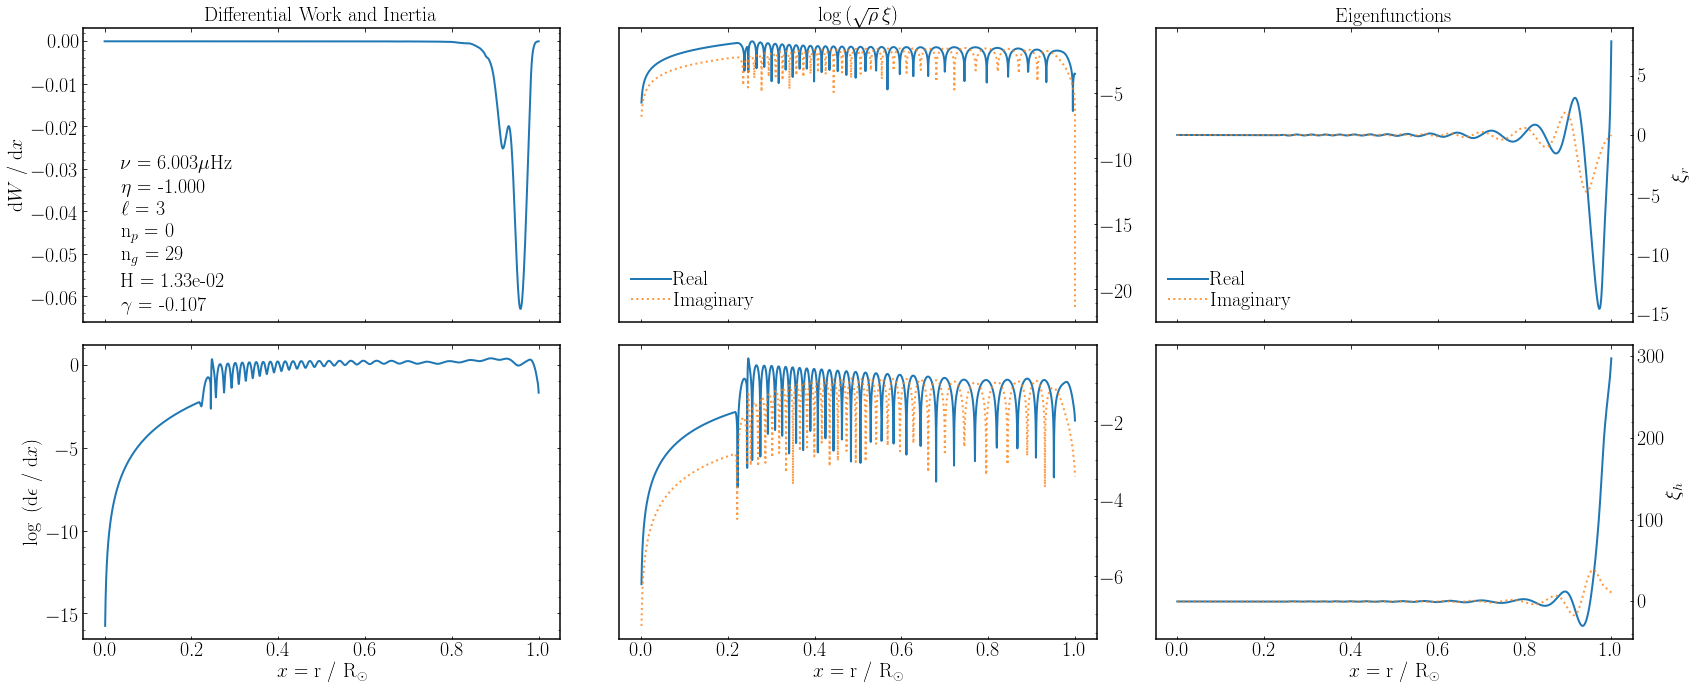

In [28]:
j=find_max_xih_ll('10/modes/10XC068_1_50mode.txt',1)
inspect_modes('10/modes/10XC068_1_50mode.'+j.zfill(5)+'.txt') 
j=find_max_xih_ll('10/modes/10XC068_1_50mode.txt',2)
inspect_modes('10/modes/10XC068_1_50mode.'+j.zfill(5)+'.txt') 
j=find_max_xih_ll('10/modes/10XC068_1_50mode.txt',3)
inspect_modes('10/modes/10XC068_1_50mode.'+j.zfill(5)+'.txt') 



# Same as above, but towards the end of the main sequence ($X_C$=0.01)

//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:61: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:62: Runt

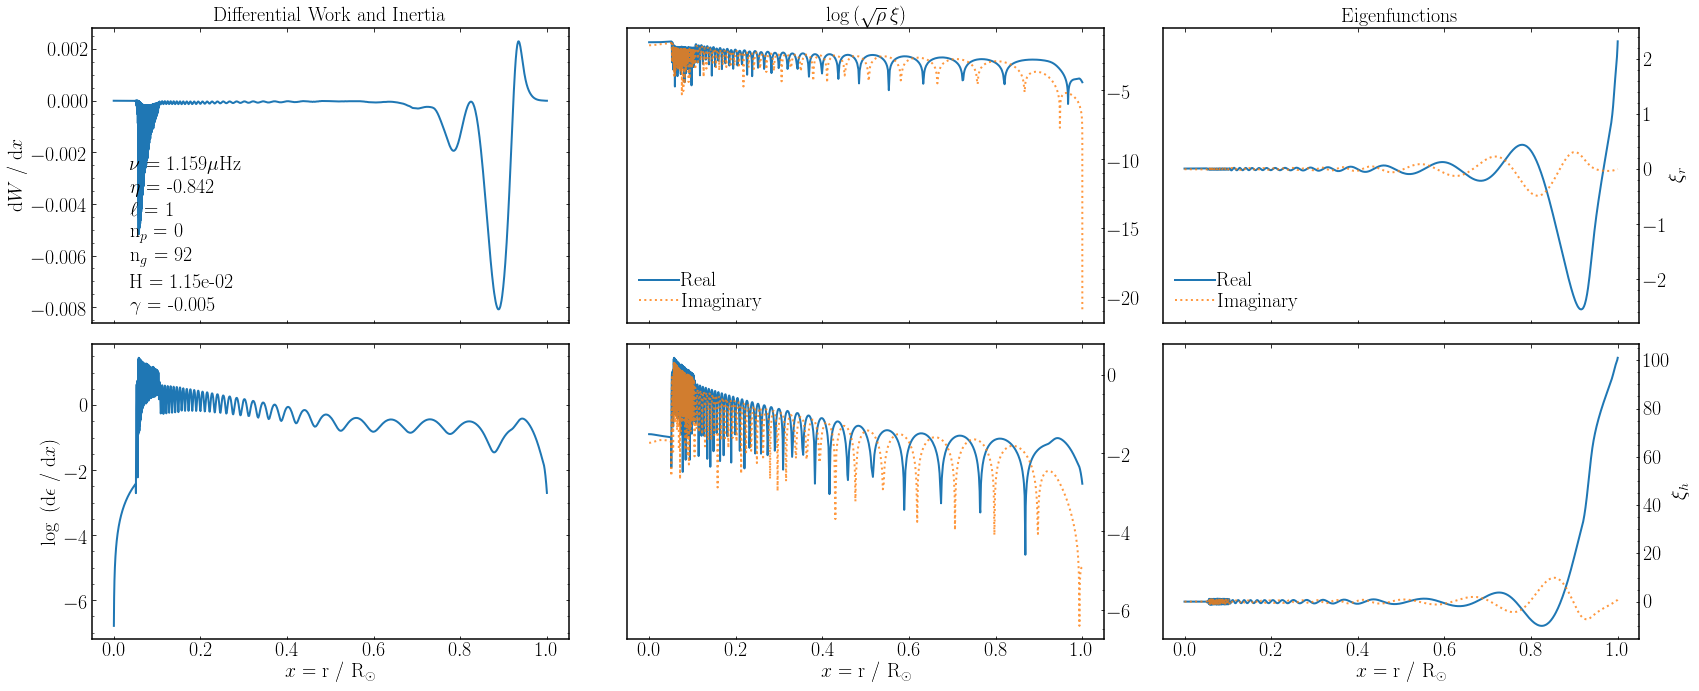

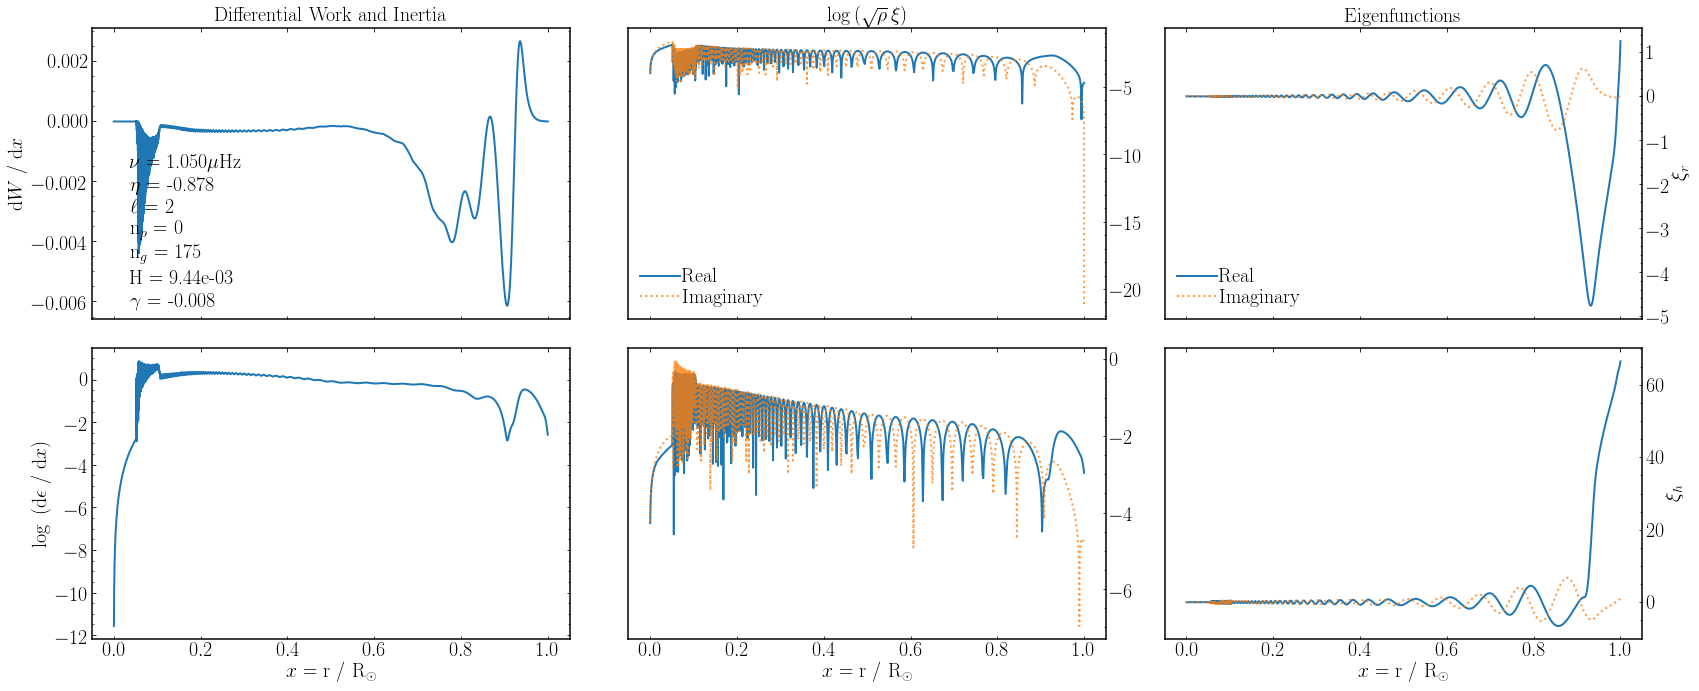

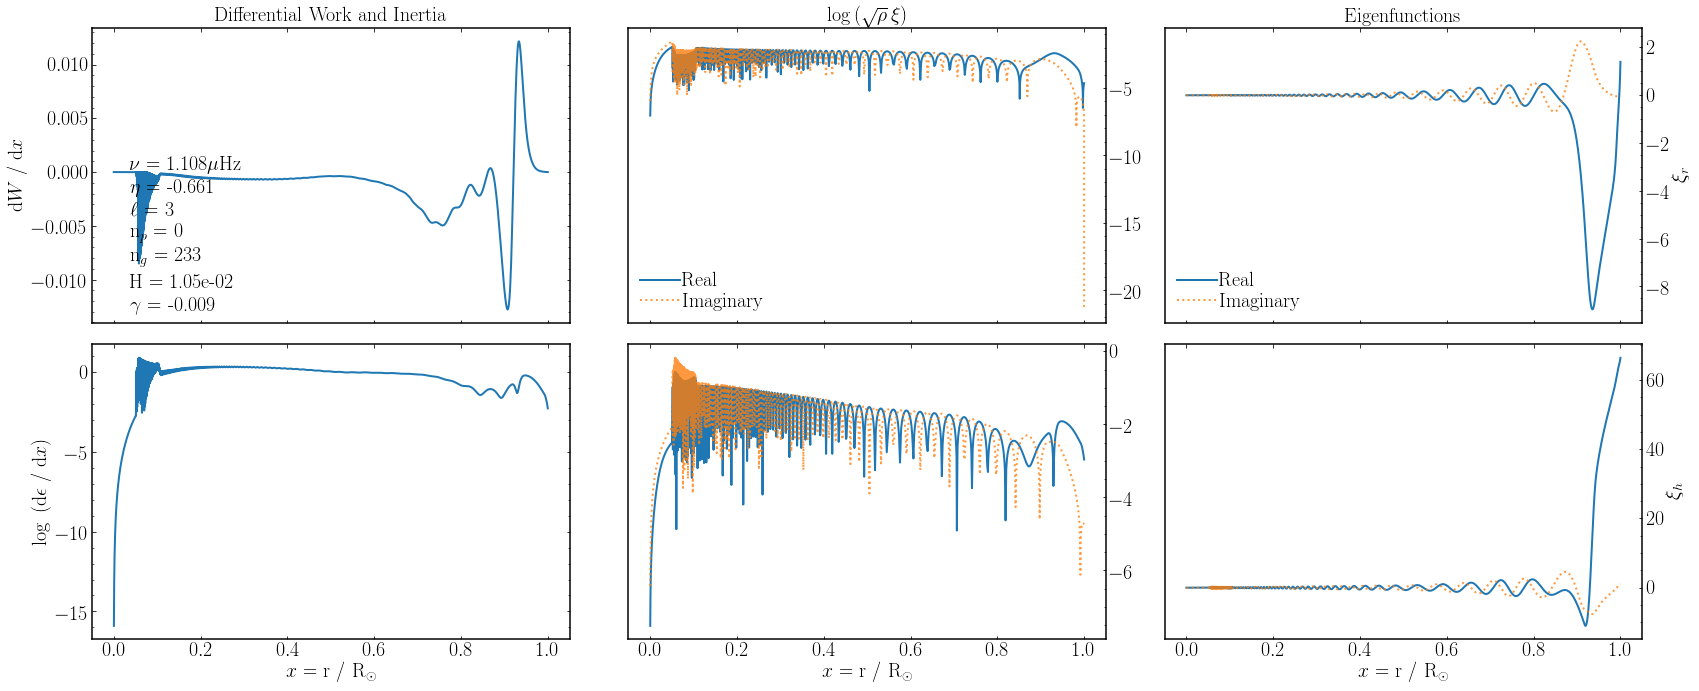

In [30]:
j=find_max_xih_ll('10/modes/10XC001_1_50mode.txt',1)
inspect_modes('10/modes/10XC001_1_50mode.'+j.zfill(5)+'.txt') 
j=find_max_xih_ll('10/modes/10XC001_1_50mode.txt',2)
inspect_modes('10/modes/10XC001_1_50mode.'+j.zfill(5)+'.txt') 
j=find_max_xih_ll('10/modes/10XC001_1_50mode.txt',3)
inspect_modes('10/modes/10XC001_1_50mode.'+j.zfill(5)+'.txt') 

# Reading MESA model (3M$_\odot$)

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


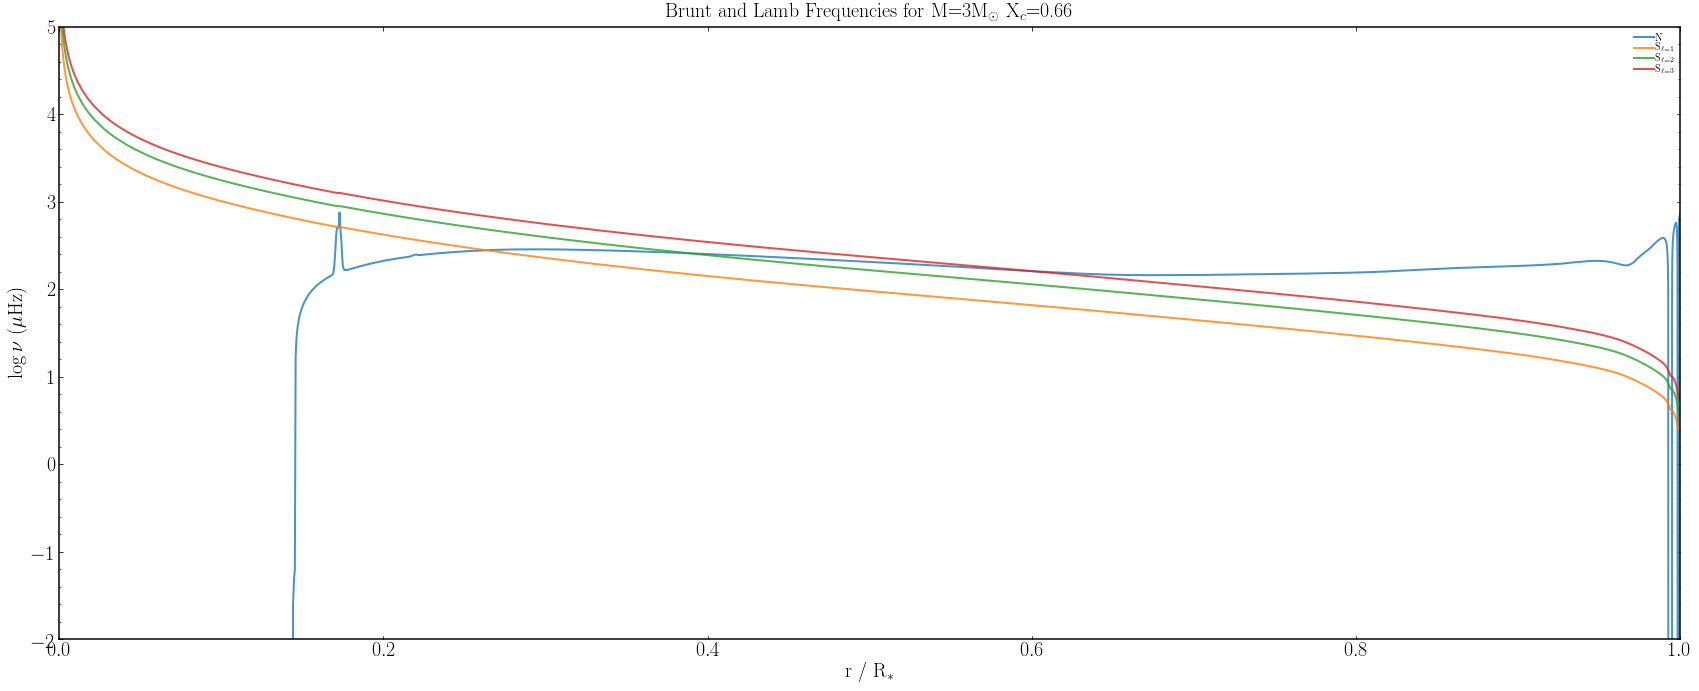

In [36]:
mesa=mr.MesaData('3/LOGS/profile1.data')
dir(mesa)
mesa.bulk_names

# Units of brunt in MESA? 
#log_brunt_nu(k) = safe_log10_cr((1d6/(2*pi))*sqrt(max(0d0,s% brunt_N2(k))))

brunt=(1e6/6.283)*10**mesa.log_brunt_N
lamb1=mesa.lamb_Sl1
lamb2=mesa.lamb_Sl2
lamb3=mesa.lamb_Sl3
plt.plot(mesa.radius/mesa.radius[1],np.log10(brunt),linewidth=2, alpha=0.8,label = r'  N')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb1),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 1}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb2),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 2}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb3),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 3}$')
legend = plt.legend(loc='upper right',fontsize=10)

plt.axis([0,1, -2,5])
plt.xlabel(r'r / R$_*$')
plt.ylabel(r'$\log \nu$ ($\mu$Hz)')
plt.title(r'Brunt and Lamb Frequencies for M=3M$_\odot$ X$_c$=0.66')
plt.savefig("Propagation3Msun.pdf")

## ... halfway the Main Sequence...

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


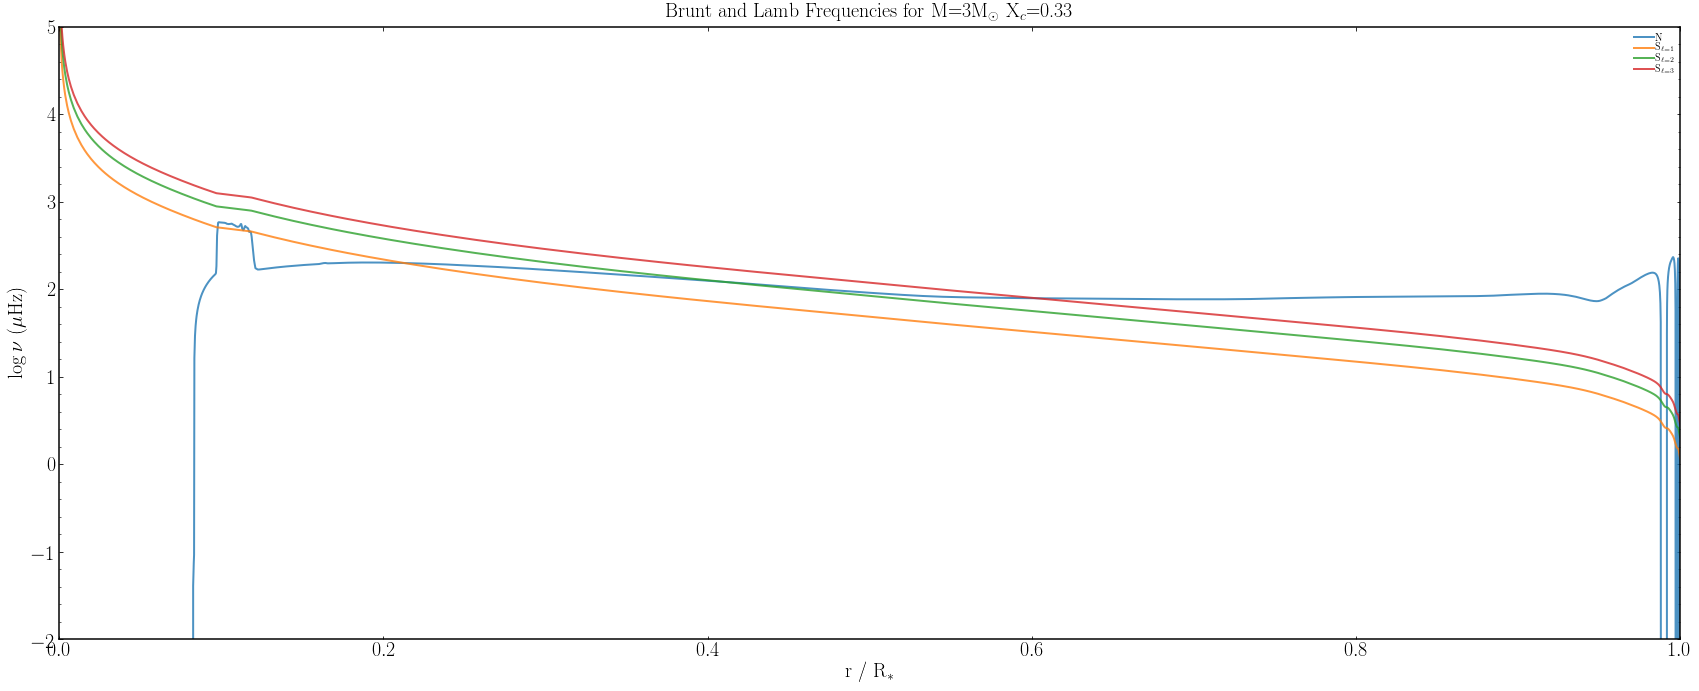

In [39]:
mesa=mr.MesaData('3/LOGS/profile2.data')
dir(mesa)
mesa.bulk_names

# Units of brunt in MESA? 
#log_brunt_nu(k) = safe_log10_cr((1d6/(2*pi))*sqrt(max(0d0,s% brunt_N2(k))))

brunt=(1e6/6.283)*10**mesa.log_brunt_N
lamb1=mesa.lamb_Sl1
lamb2=mesa.lamb_Sl2
lamb3=mesa.lamb_Sl3
plt.plot(mesa.radius/mesa.radius[1],np.log10(brunt),linewidth=2, alpha=0.8,label = r'  N')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb1),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 1}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb2),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 2}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb3),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 3}$')
legend = plt.legend(loc='upper right',fontsize=10)

plt.axis([0,1, -2,5])
plt.xlabel(r'r / R$_*$')
plt.ylabel(r'$\log \nu$ ($\mu$Hz)')
plt.title(r'Brunt and Lamb Frequencies for M=3M$_\odot$ X$_c$=0.33')
plt.savefig("Propagation3Msun_033.pdf")

## ...at the end of the Main Sequence

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


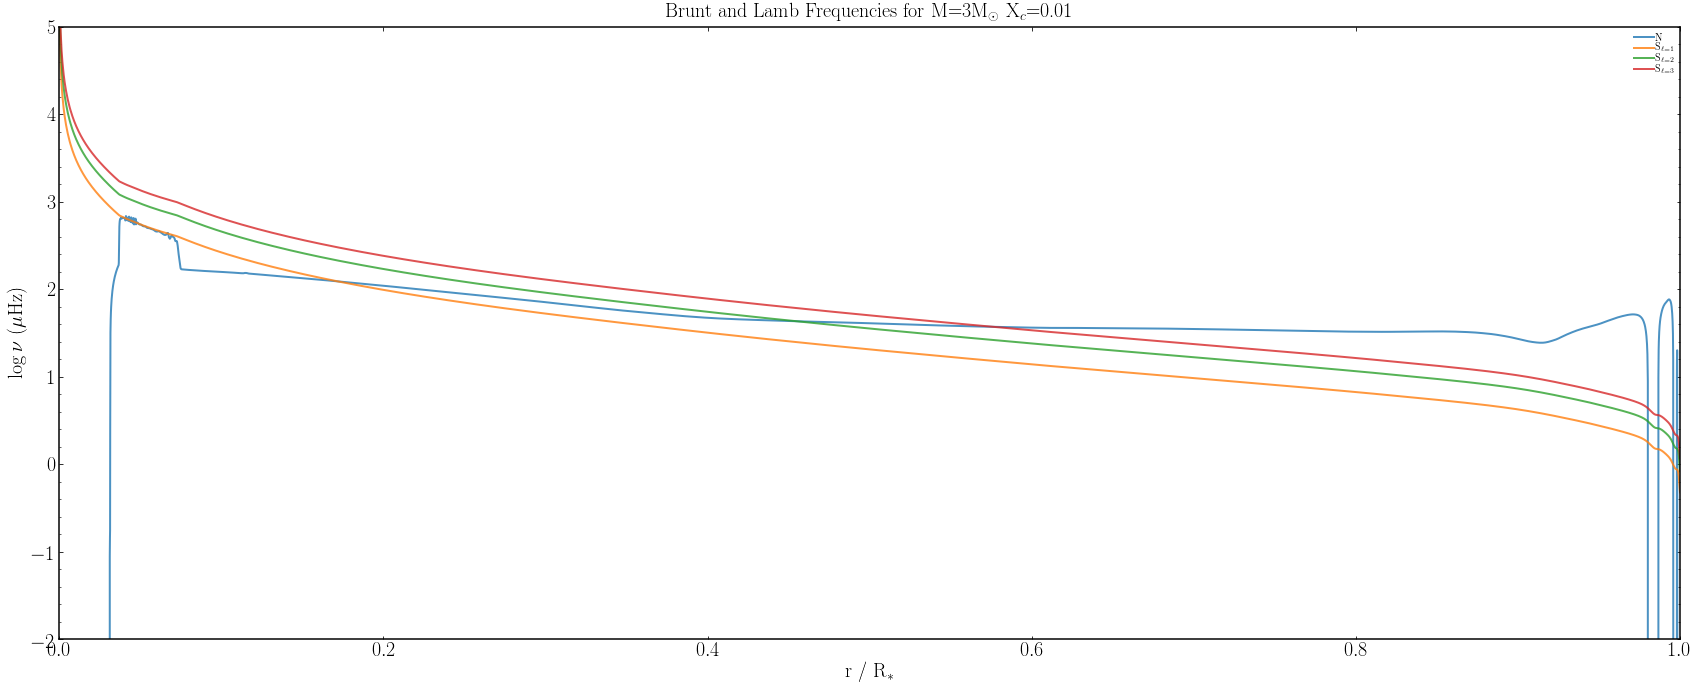

In [38]:
mesa=mr.MesaData('3/LOGS/profile3.data')
dir(mesa)
mesa.bulk_names

# Units of brunt in MESA? 
#log_brunt_nu(k) = safe_log10_cr((1d6/(2*pi))*sqrt(max(0d0,s% brunt_N2(k))))

brunt=(1e6/6.283)*10**mesa.log_brunt_N
lamb1=mesa.lamb_Sl1
lamb2=mesa.lamb_Sl2
lamb3=mesa.lamb_Sl3
plt.plot(mesa.radius/mesa.radius[1],np.log10(brunt),linewidth=2, alpha=0.8,label = r'  N')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb1),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 1}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb2),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 2}$')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb3),linewidth=2, alpha=0.8,label = r'  S$_{\ell = 3}$')
legend = plt.legend(loc='upper right',fontsize=10)

plt.axis([0,1, -2,5])
plt.xlabel(r'r / R$_*$')
plt.ylabel(r'$\log \nu$ ($\mu$Hz)')
plt.title(r'Brunt and Lamb Frequencies for M=3M$_\odot$ X$_c$=0.01')
plt.savefig("Propagation3Msun_TAMS.pdf")

# Let's look at the 3 Msun model modes (beginning,  middle and end of Main Sequence Evolution)

//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:61: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:62: Runt

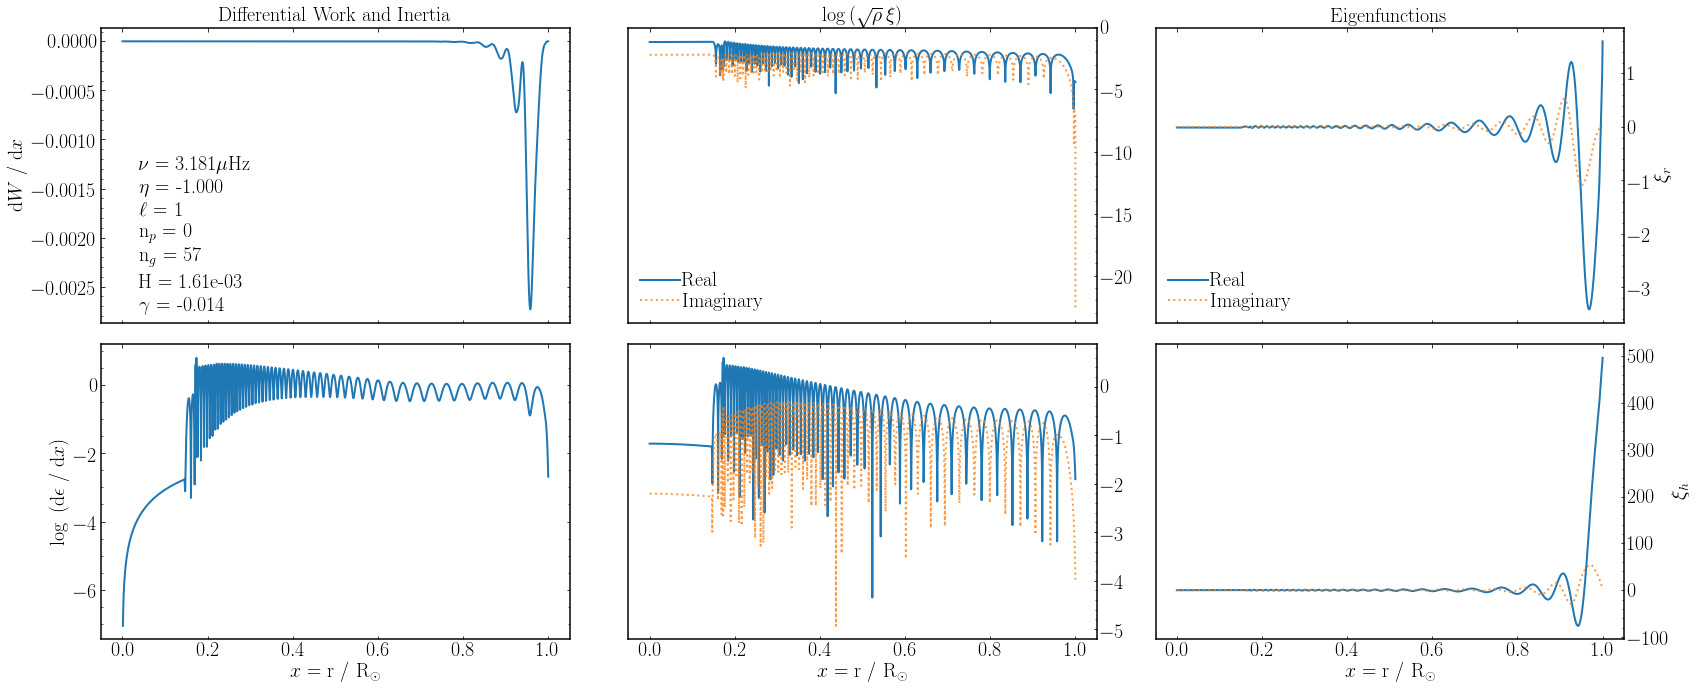

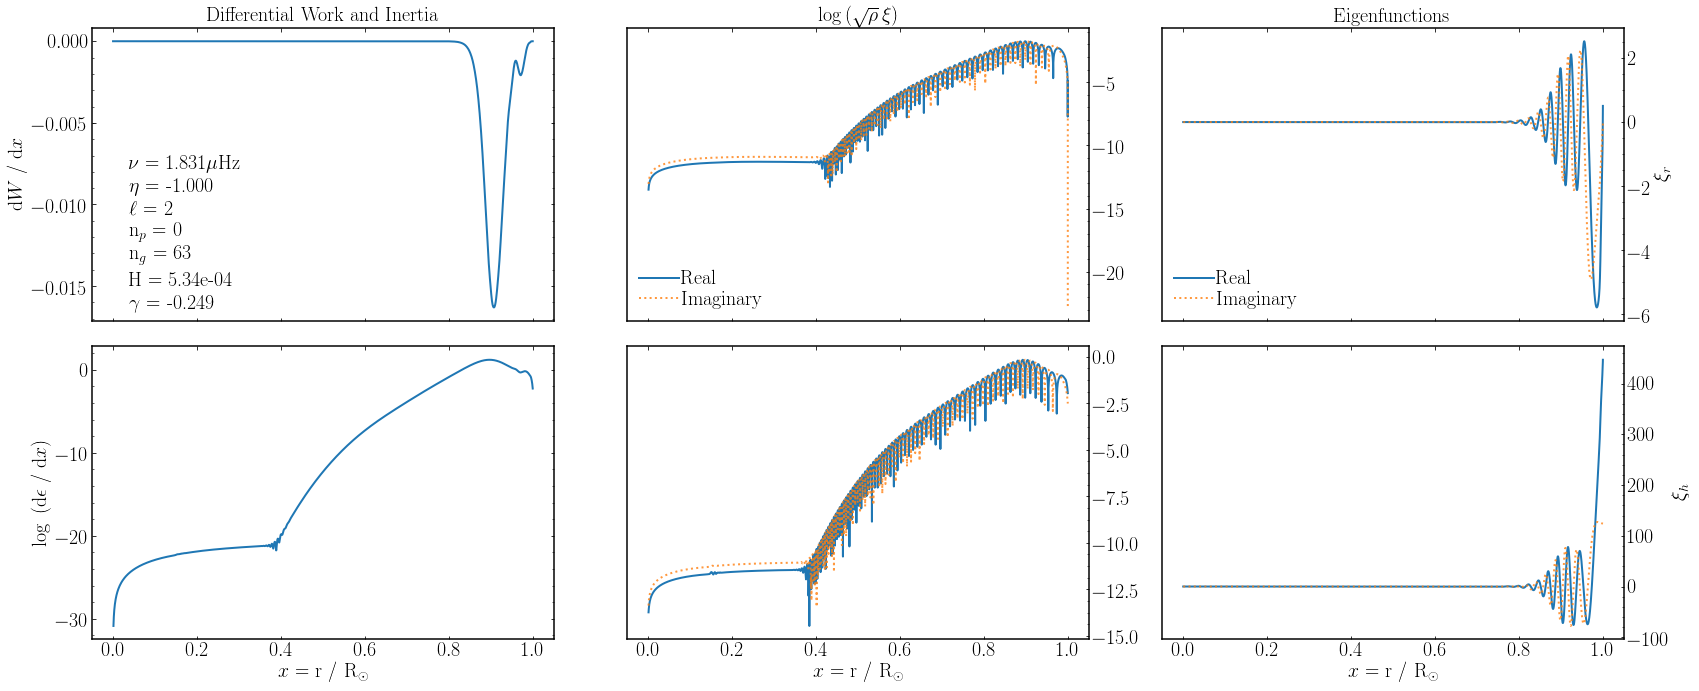

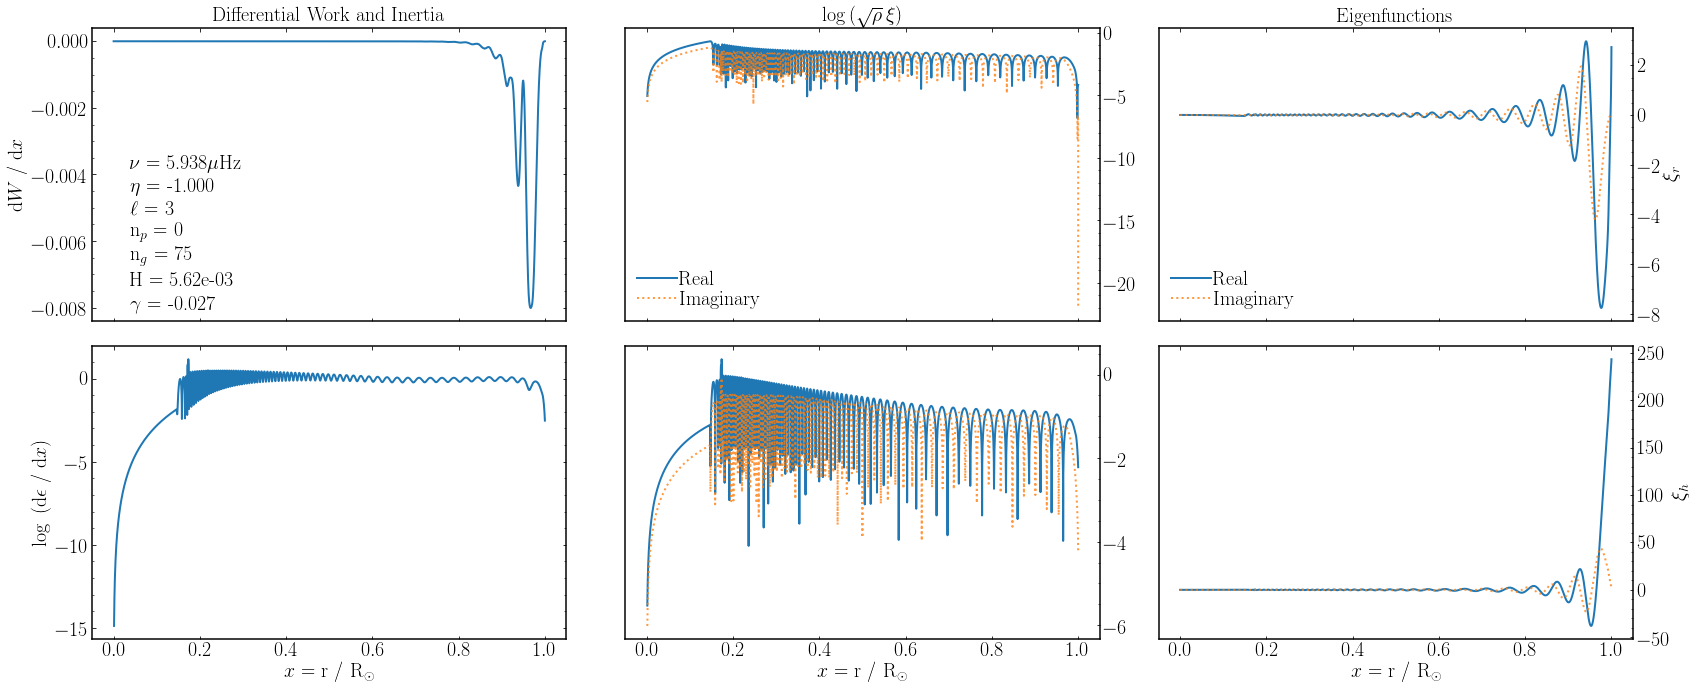

In [42]:
j=find_max_xih_ll('3/modes/3XC068_1_50mode.txt',1)
inspect_modes('3/modes/3XC068_1_50mode.'+j.zfill(5)+'.txt') 
j=find_max_xih_ll('3/modes/3XC068_1_50mode.txt',2)
inspect_modes('3/modes/3XC068_1_50mode.'+j.zfill(5)+'.txt') 
j=find_max_xih_ll('3/modes/3XC068_1_50mode.txt',3)
inspect_modes('3/modes/3XC068_1_50mode.'+j.zfill(5)+'.txt') 

//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:61: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:62: Runt

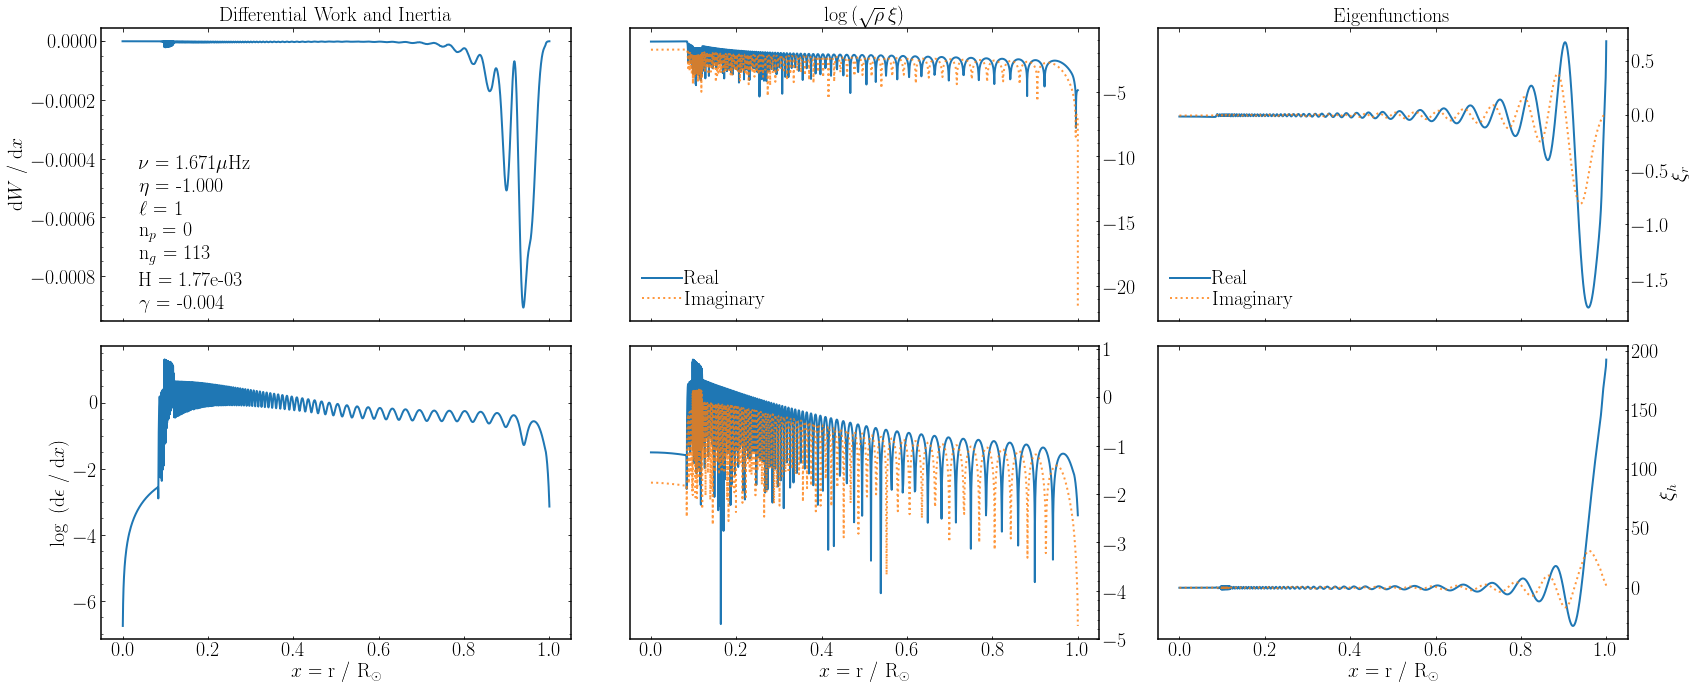

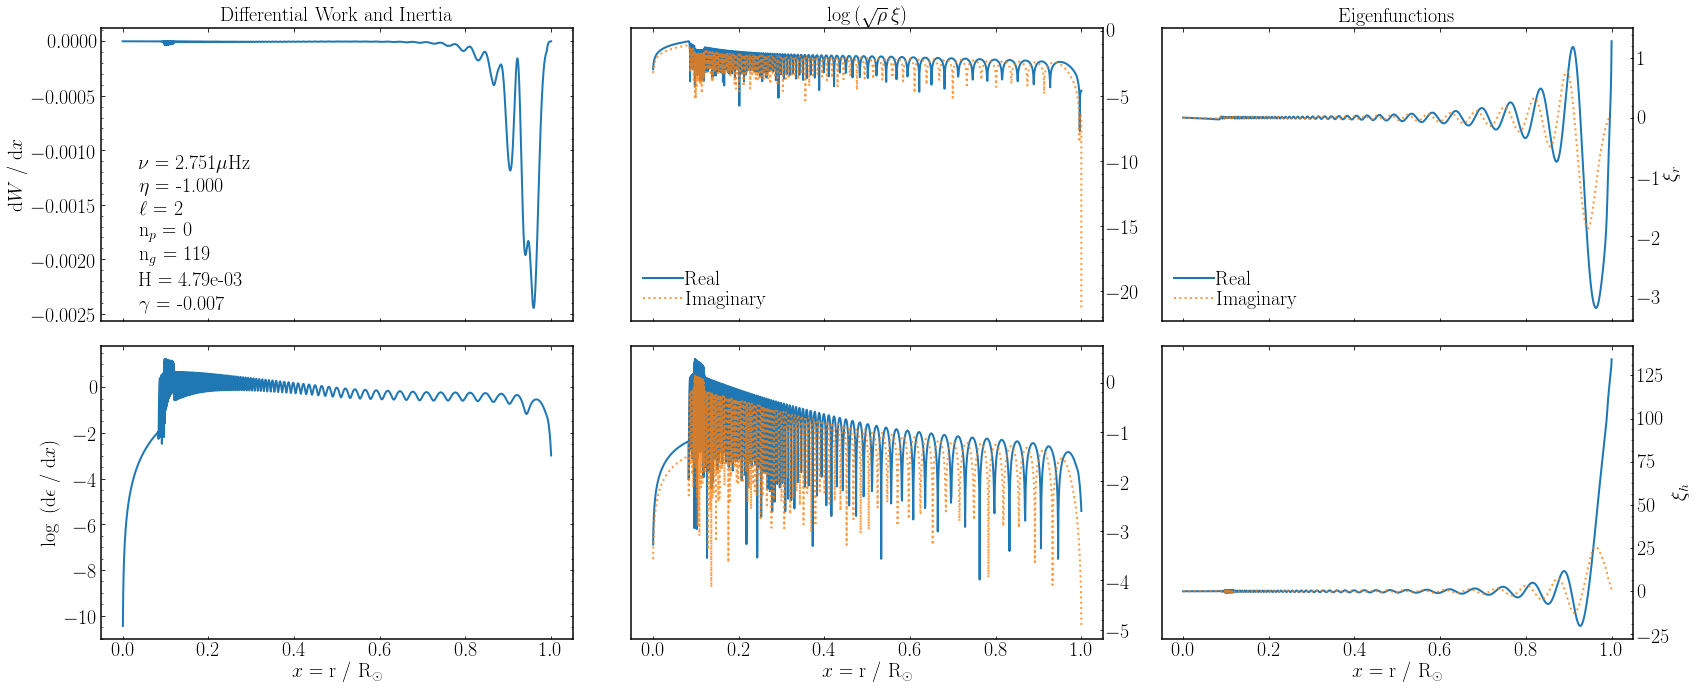

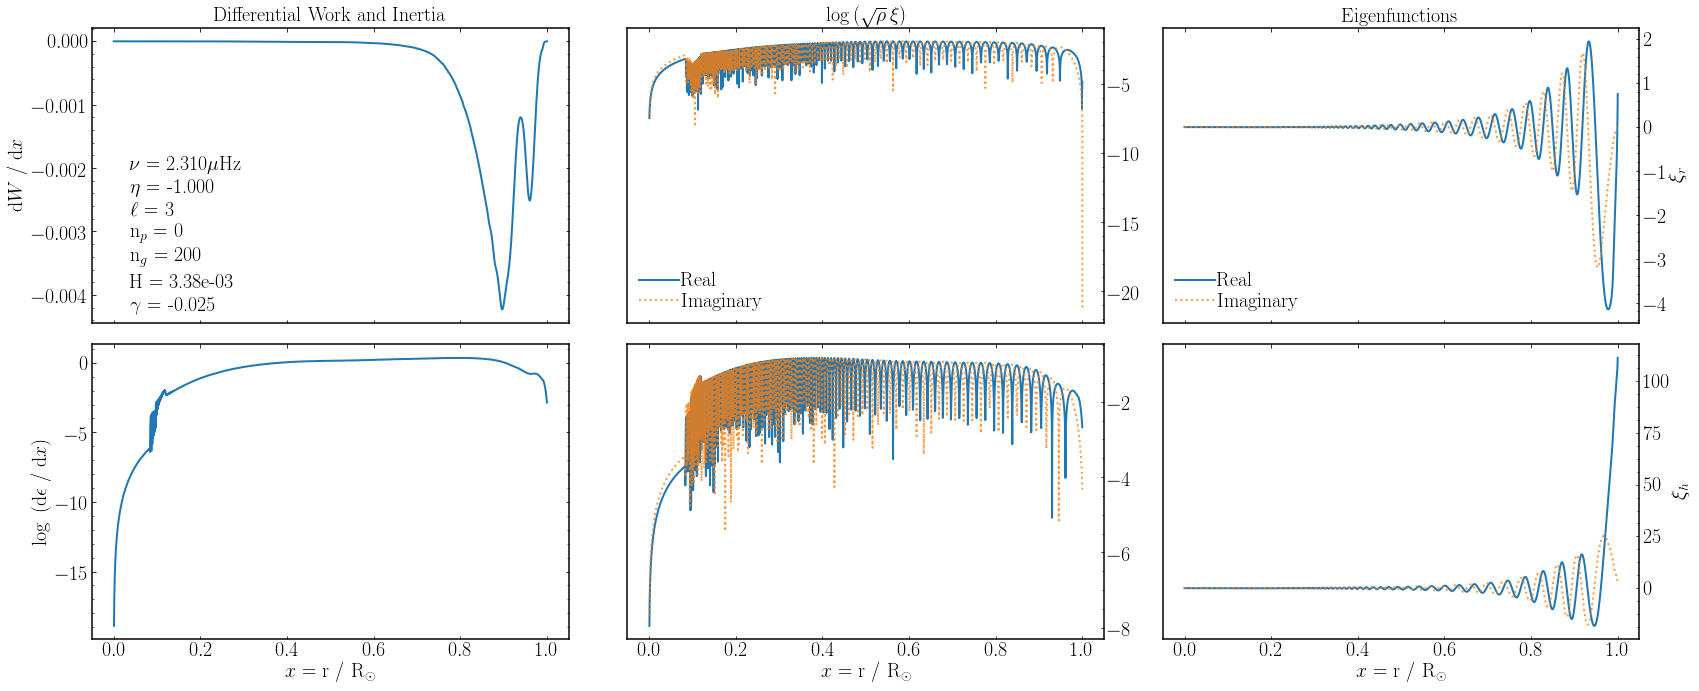

In [41]:
j=find_max_xih_ll('3/modes/3XC033_1_50mode.txt',1)
inspect_modes('3/modes/3XC033_1_50mode.'+j.zfill(5)+'.txt') 
j=find_max_xih_ll('3/modes/3XC033_1_50mode.txt',2)
inspect_modes('3/modes/3XC033_1_50mode.'+j.zfill(5)+'.txt') 
j=find_max_xih_ll('3/modes/3XC033_1_50mode.txt',3)
inspect_modes('3/modes/3XC033_1_50mode.'+j.zfill(5)+'.txt') 

//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
//anaconda/lib/python3.5/site-packages/tomso/gyre.py:41: UserWarning: genfromtxt: Empty input file: "[b'\n', b'\n']"
  header = np.genfromtxt(lines[2:4], names=True)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:61: RuntimeWarning: divide by zero encountered in log10
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:62: Runt

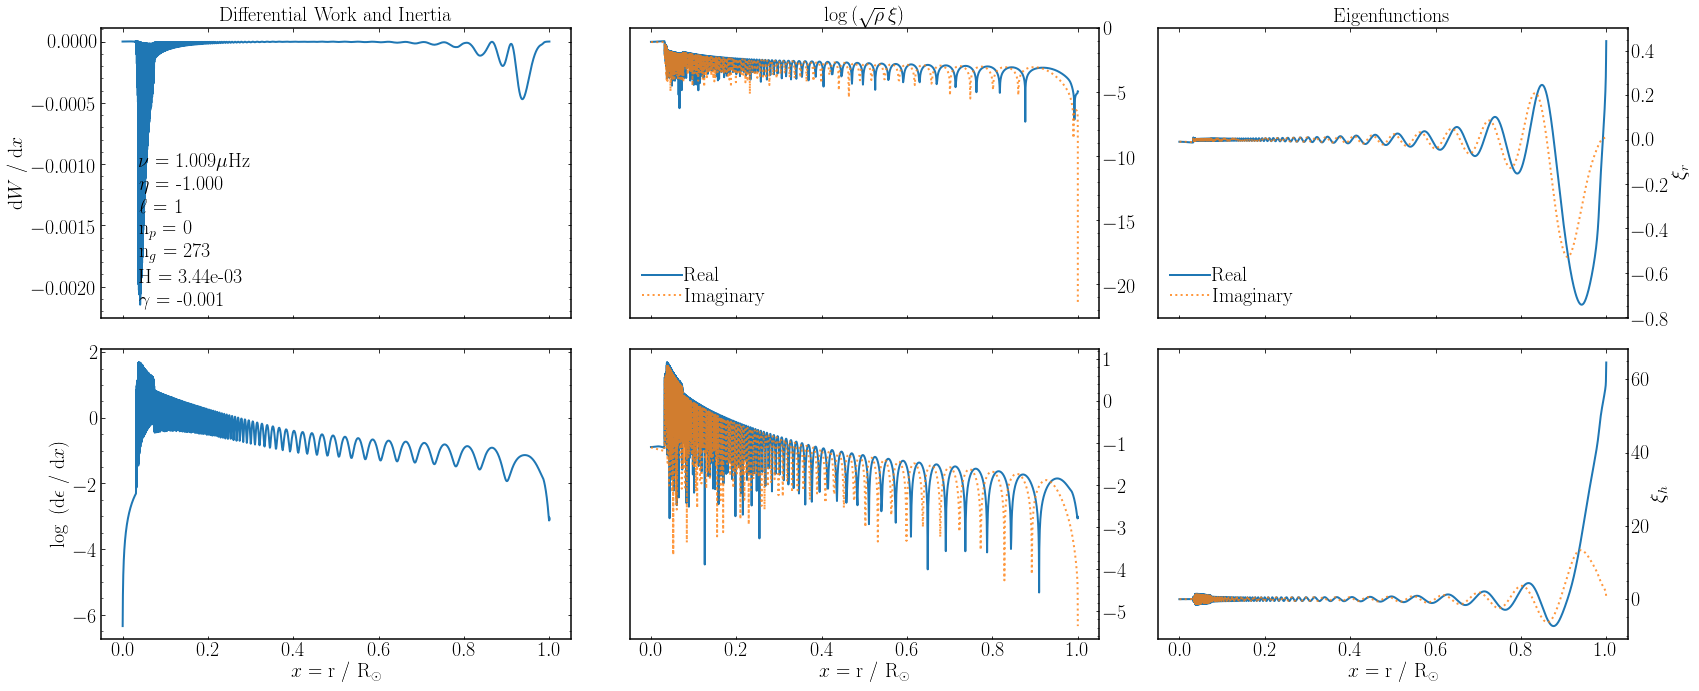

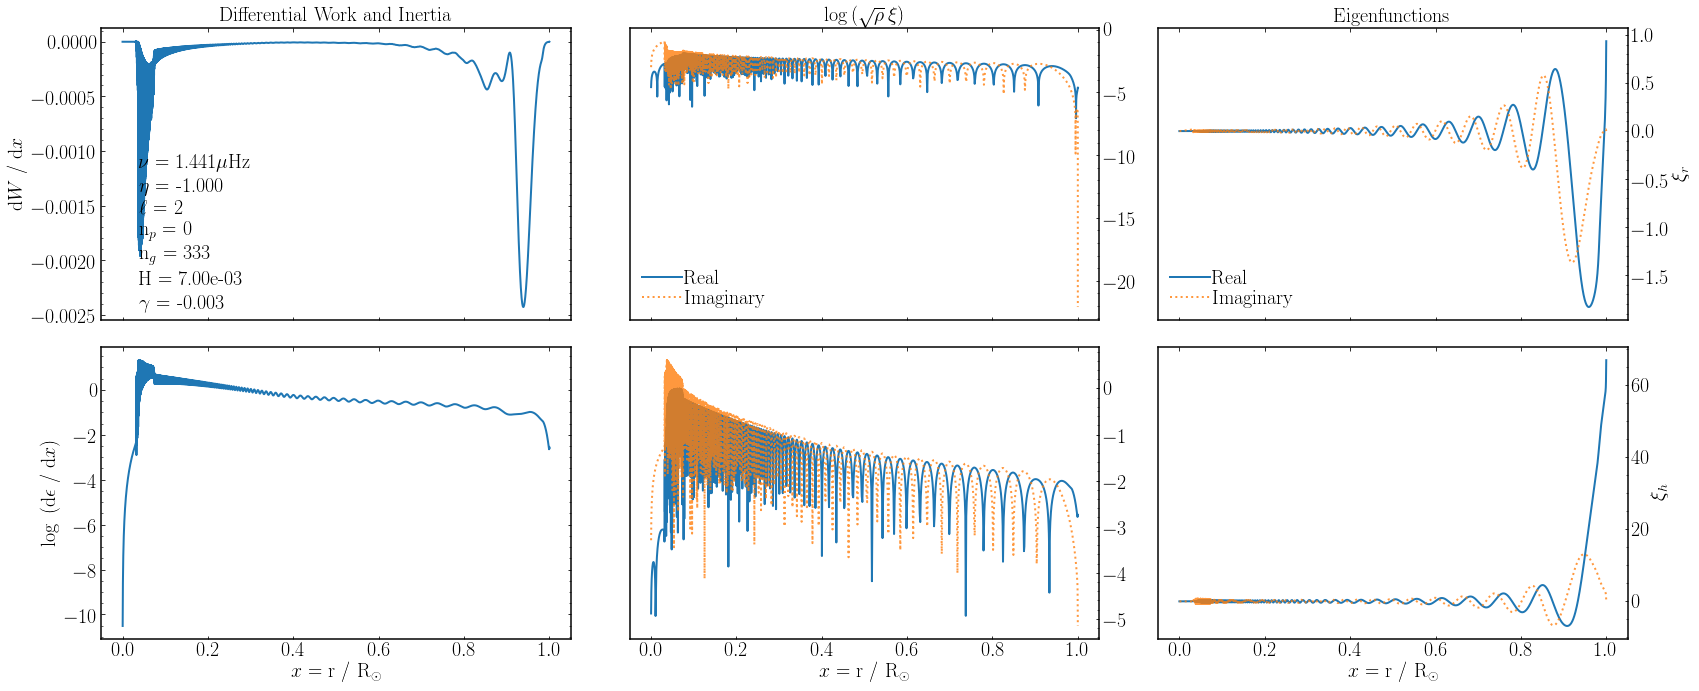

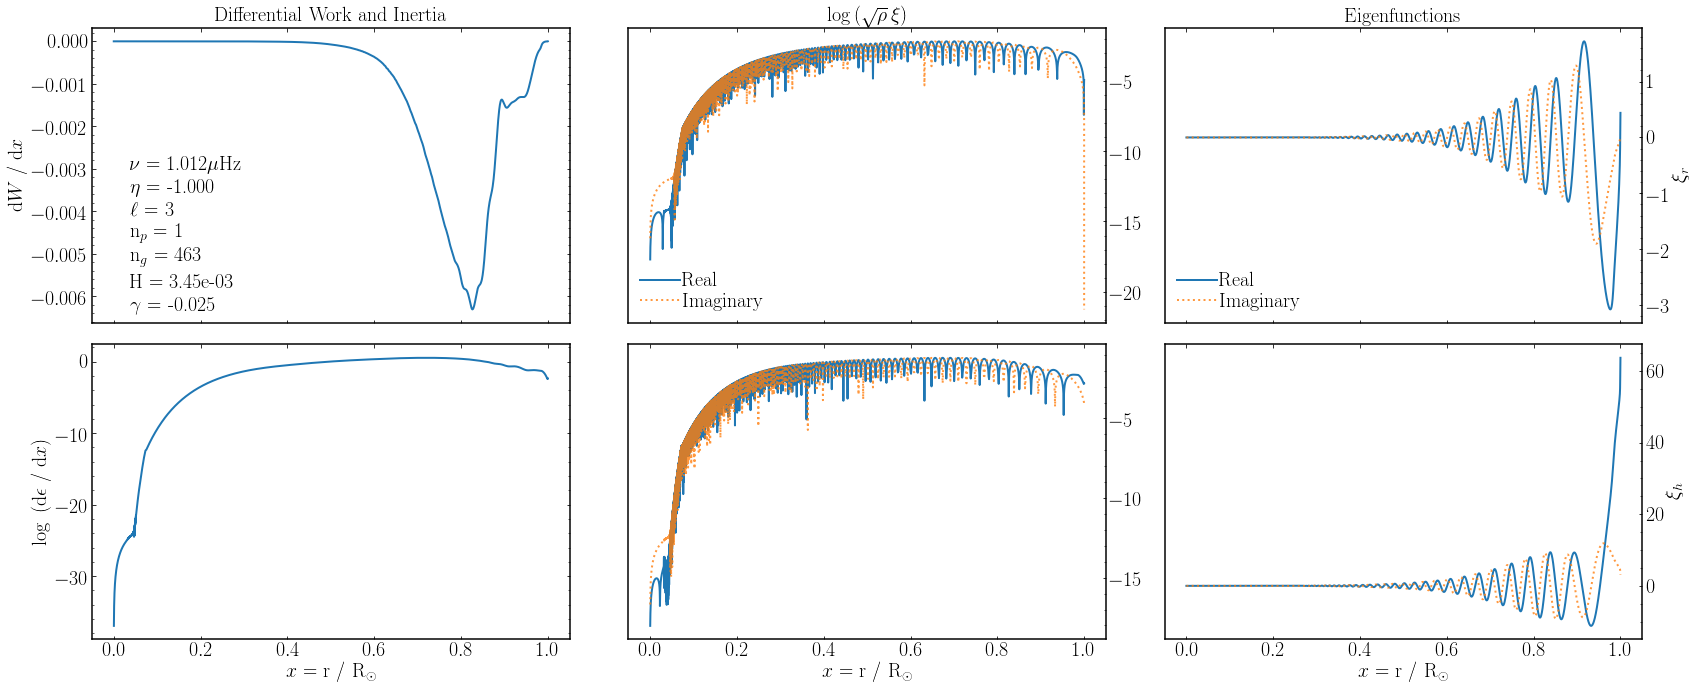

In [33]:
j=find_max_xih_ll('3/modes/3XC001_1_50mode.txt',1)
inspect_modes('3/modes/3XC001_1_50mode.'+j.zfill(5)+'.txt') 
j=find_max_xih_ll('3/modes/3XC001_1_50mode.txt',2)
inspect_modes('3/modes/3XC001_1_50mode.'+j.zfill(5)+'.txt') 
j=find_max_xih_ll('3/modes/3XC001_1_50mode.txt',3)
inspect_modes('3/modes/3XC001_1_50mode.'+j.zfill(5)+'.txt') 